In [2]:
import eagleSqlTools as sql
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

1. Retrieving EAGLE Galaxy properties: your first SQL query in python

In [2]:
import eagleSqlTools as sql  #http://virgodb.dur.ac.uk:8080/Eagle/Help?page=databases/fiducial_models/refl0100n1504_subhalo
import numpy as np
import matplotlib.pyplot as plt

# Run SQL query on the EAGLE database, and return some data for all of the galaxies in the final output of the largest volume simulation
username = 'rvj764'
password = 'sv34QMT7'

# Creates a connection to write on query
con = sql.connect(username, password=password)

# In python, we write the queries in an object called a docstring, which is essentially just a multi-line string:
query = """SELECT 
                MassType_Star as stellar_mass,
                StarFormationRate as SFR
         FROM 
                RefL0100N1504_SubHalo
         WHERE 
                SnapNum = 28"""

# The query will then be placed in the variable "data" which stores the output
data = sql.execute_query(con, query)

# Save the data to a file

np.savetxt("query_data_part1.txt", data, delimiter=",")

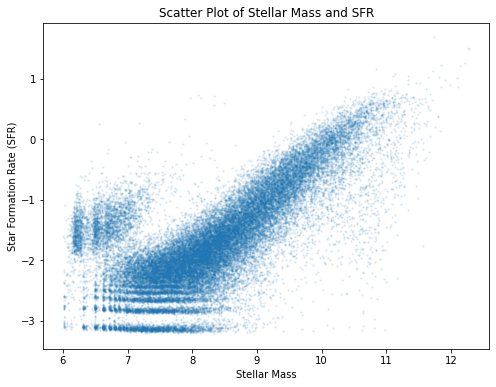

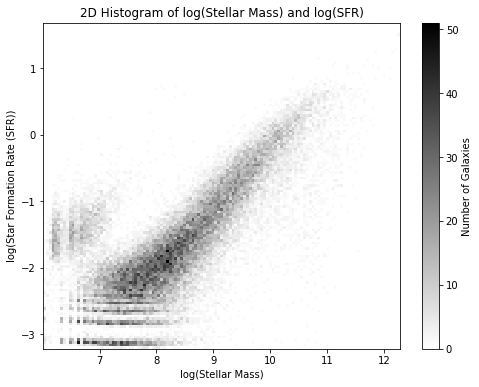

In [40]:
# RUN
# Load the data from the file
loaded_data = np.loadtxt("query_data_part1.txt", delimiter=",")

# Assign the stellar mass and SFR from loaded data to variables
stellar_mass = loaded_data[:, 0]
sfr = loaded_data[:, 1]

# Scatter plot
plt.figure(figsize=(8,6))
filter = (stellar_mass > 0) & (sfr > 0)
log_stellar_mass = np.log10(stellar_mass[filter])
log_SFR = np.log10(sfr[filter])
plt.scatter(log_stellar_mass, log_SFR, s=2, alpha=0.1)
plt.xlabel("Stellar Mass")
plt.ylabel("Star Formation Rate (SFR)")
plt.title("Scatter Plot of Stellar Mass and SFR")
plt.show()

# 2D Histogram
plt.figure(figsize=(8,6))
plt.hist2d(log_stellar_mass, log_SFR, bins = 125, cmap='binary') 
plt.xlabel("log(Stellar Mass)")
plt.ylabel("log(Star Formation Rate (SFR))")
plt.title("2D Histogram of log(Stellar Mass) and log(SFR)")
plt.colorbar(label='Number of Galaxies')
plt.show()



1.5. Stretch Goal

In [4]:
import eagleSqlTools as sql 
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
username = 'rvj764'
password = 'sv34QMT7'

con = sql.connect(username, password=password)

# Relating what we see from the figure above to an easily observable property of the galaxies - their colour

query = """
SELECT
    s.MassType_Star as stellar_mass,
    s.StarFormationRate as SFR,
    m.g_nodust as g_band,
    m.r_nodust as r_band
FROM
    RefL0100N1504_SubHalo as s,
    RefL0100N1504_Magnitudes as m
WHERE
    s.SnapNum = 28
    AND s.GalaxyID = m.GalaxyID
"""

data = sql.execute_query(con, query)

# Save the data to a file
np.savetxt("query_data_part1.5.txt", data, delimiter=',')

In [31]:
gminusr

array([0.53174973, 0.50728416, 0.42988586, ..., 0.69696045, 0.73285294,
       0.70400524])

/tmp/ipykernel_10665/1252717322.py:15: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(stellar_mass), np.log10(sfr), c=gminusr, cmap=plt.cm.magma, s=2, alpha=0.8, linewidth=0)


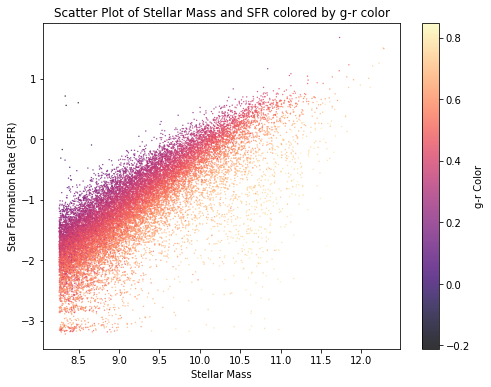

In [38]:
# Load the data from the file
data = np.loadtxt('query_data_part1.5.txt', delimiter=',')

stellar_mass = data[:, 0]
sfr = data[:, 1]
g_band = data[:, 2]
r_band = data[:, 3]

# Calculate the g-r color-> difference btwn brightness of the galaxy in two wavelength bands
gminusr = g_band - r_band

# Scatter plot
plt.figure(figsize=(8, 6))
#plt.loglog(stellar_mass, sfr, '.', c=gminusr, s=10, alpha=0.5, cmap='viridis')
plt.scatter(np.log10(stellar_mass), np.log10(sfr), c=gminusr, cmap=plt.cm.magma, s=2, alpha=0.8, linewidth=0)
# plt.xlim(0, 0.8e12)  # Adjust the limits according to your data
# plt.ylim(0, 10)  # Adjust the limits according to your data
plt.xlabel("Stellar Mass")
plt.ylabel("Star Formation Rate (SFR)")
plt.title("Scatter Plot of Stellar Mass and SFR colored by g-r color")
plt.colorbar(label='g-r Color')
plt.show()



EXTRA:(used to print out query column names)

2. Going Deeper into the Simulations: More properties and More snapshots

In [61]:
import eagleSqlTools as sql
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

username = 'rvj764'
password = 'sv34QMT7'

con = sql.connect(username, password=password)

query="""SELECT 
                MassType_Star as stellar_mass,
                StarFormationRate as SFR, Redshift
         FROM 
                RefL0100N1504_SubHalo
         WHERE 
                Redshift > 0 AND Redshift < 0.5"""

data_modified = sql.execute_query(con, query)

# Save the data to a file
np.savetxt('query_data_part2.txt', np.column_stack((data_modified['stellar_mass'], data_modified['SFR'], data_modified['Redshift'])), delimiter=',')


In [60]:
len(data_loaded)

250612

In [58]:
len(stellar_mass_modified), len(filter_modified), len(sfr_modified)
# np.log10(stellar_mass_modified)
np.any(stellar_mass_modified==0)

True

Modified number of galaxies:  11819412


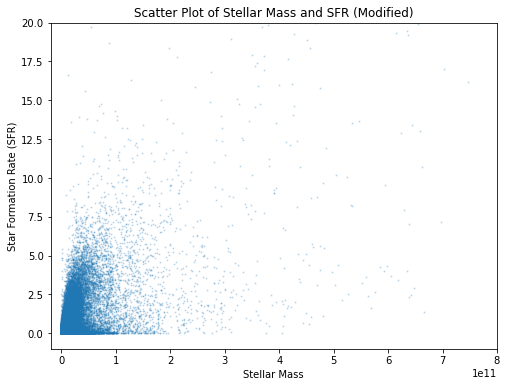

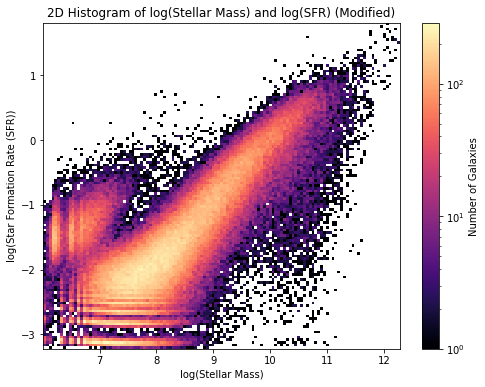

In [4]:
import matplotlib as mpl

# Load the data from the file
data_loaded = np.loadtxt('query_data_part2.txt', delimiter=',')

stellar_mass_modified = data_loaded[:, 0]
sfr_modified = data_loaded[:, 1]
redshift_modified = data_loaded[:, 2]

#print("Original number of galaxies: ", len(stellar_mass))
print("Modified number of galaxies: ", len(stellar_mass_modified))
#Original number of galaxies:  2275510
#Modified number of galaxies:  11819412

# Scatter plot
plt.figure(figsize=(8, 6))
plt.xlim(-0.02e12, 0.8e12)  # Adjust the limits according to your data
plt.ylim(-1, 20)  # Adjust the limits according to your data
plt.scatter(stellar_mass_modified, sfr_modified, s=1, alpha=0.2)
plt.xlabel("Stellar Mass")
plt.ylabel("Star Formation Rate (SFR)")
plt.title("Scatter Plot of Stellar Mass and SFR (Modified)")
plt.show()

# 2D Histogram
# Filter out zero values
filter_modified = (stellar_mass_modified > 0) & (sfr_modified > 0)
# Log scale
log_stellar_mass_modified = np.log10(stellar_mass_modified[filter_modified])
log_SFR_modified = np.log10(sfr_modified[filter_modified])
# Adjust number of bins to optimize the visualization
plt.figure(figsize=(8, 6))
plt.hist2d(log_stellar_mass_modified, log_SFR_modified, bins=125,norm=mpl.colors.LogNorm(), cmap=plt.cm.magma)
# plt.hist2d(np.log10(stellar_mass_modified), np.log10(sfr_modified), bins=125,norm=mpl.colors.LogNorm(), cmap=plt.cm.magma)
plt.xlabel("log(Stellar Mass)")
plt.ylabel("log(Star Formation Rate (SFR))")
plt.title("2D Histogram of log(Stellar Mass) and log(SFR) (Modified)")
plt.colorbar(label='Number of Galaxies')
plt.show()


2.3-4. Stretch Goal -> Does not work (might have to look at descendants differently) - indexs are 0?

In [5]:
import eagleSqlTools as sql 
import matplotlib.pyplot as plt
import numpy as np

username = 'rvj764'
password = 'sv34QMT7'

# Establish connection to the SQL database
con = sql.connect(username, password=password)

query_most_massive_galaxy = """SELECT TOP 1
                                   GalaxyID,
                                   DescendantID,
                                   TopLeafID,
                                   LastProgID,
                                   Mass AS total_mass
                               FROM
                                   RefL0100N1504_SubHalo
                               WHERE
                                   SnapNum = 28
                               ORDER BY
                                   total_mass DESC
                               """
most_massive_galaxy = sql.execute_query(con, query_most_massive_galaxy)


query_direct_descendants = f"""SELECT
                                   GalaxyID,
                                   DescendantID,
                                   TopLeafID,
                                   LastProgID,
                                   Redshift,
                                   Mass AS total_mass
                               FROM
                                   RefL0100N1504_SubHalo
                               WHERE
                                   GalaxyID BETWEEN {most_massive_galaxy['LastProgID'][0]} AND {most_massive_galaxy['TopLeafID'][0]}
                               ORDER BY
                                   Redshift ASC"""
direct_descendants = sql.execute_query(con, query_direct_descendants)


query_all_descendants = f"""SELECT
                               GalaxyID,
                               DescendantID,
                               TopLeafID,
                               LastProgID,
                               Redshift,
                               Mass AS total_mass
                           FROM
                               RefL0100N1504_SubHalo
                           WHERE
                               GalaxyID BETWEEN {most_massive_galaxy['GalaxyID'][0]} AND {most_massive_galaxy['DescendantID'][0]}
                           ORDER BY
                               Redshift ASC"""
all_descendants = sql.execute_query(con, query_all_descendants)

# Plot the total mass for all descendants and main branch descendants
plt.figure(figsize=(8, 6))
plt.plot(all_descendants['Redshift'], all_descendants['total_mass'], label="All descendants")
plt.plot(direct_descendants['Redshift'], direct_descendants['total_mass'], label="Main Branch descendants")
plt.xlabel("Redshift")
plt.ylabel("Total Mass")
plt.title("Total Mass of Galaxies in the Tree at Every Time-step (Redshift)")
plt.legend()
plt.show()




IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

3. Another Simulation: Querying data from IllustrisTNG

Number of galaxies at z=0 in TNG100-1 simulation: 4371211


100%|█████████████████████████████████████████| 100/100 [01:17<00:00,  1.29it/s]


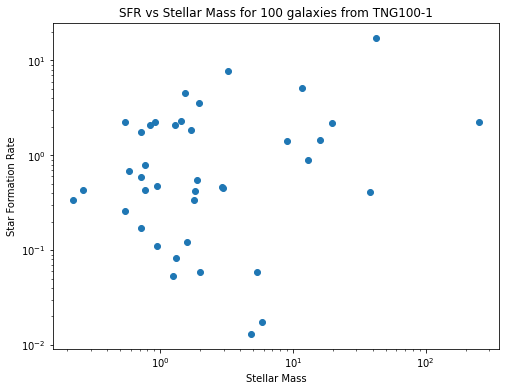

In [12]:
import requests # This ocde only plots 100 galaxies and anything bigger causes a r
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

baseUrl = 'http://www.tng-project.org/api/'
headers = {"api-key":"5616d71cc2f64b23e94946f406ece781"} #enter your own API key here

def get(path, params=None):
    r = requests.get(path, params=params, headers=headers)
    r.raise_for_status()
    if r.headers['content-type'] == 'application/json':
        return r.json()
    return r

z0url = 'http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos'

response = get(z0url)
n_gal = response['count']
print("Number of galaxies at z=0 in TNG100-1 simulation:", n_gal)

n_gal = 100 # setting the number of galaxies to 100 instead of the total number available
subhalos = get(z0url, {'limit':n_gal})

fields = ['id', 'sfr', 'mass_stars']
r = {}
for field in fields:
    if field == 'id':
        r[field] = np.empty(n_gal, dtype = int)
    else:
        r[field] = np.empty(n_gal, dtype = float)

for i in tqdm(range(n_gal)):
    sub_i = get(subhalos['results'][i]['url'])
    for field in fields:
        r[field][i] = sub_i[field]

# Plotting SFR vs SM
plt.figure(figsize=(8, 6))
plt.loglog(r['mass_stars'], r['sfr'], 'o')
plt.xlabel('Stellar Mass')
plt.ylabel('Star Formation Rate')
plt.title('SFR vs Stellar Mass for 100 galaxies from TNG100-1')
plt.show()


4.1 (EAGLE) Isolating Milky Way-like galaxies in the galaxy color-magnitude diagram

In [15]:
import eagleSqlTools as sql
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

username = 'rvj764'
password = 'sv34QMT7'

con = sql.connect(username, password=password)

# The query selects only galaxies with stellar mass greater than 1e9
query = """SELECT
                s.MassType_Star as stellar_mass,
                s.StarFormationRate as SFR,
                m.g_nodust as g_band,
                m.r_nodust as r_band,
                s.SnapNum as snapnum
           FROM
                RefL0100N1504_SubHalo as s,
                RefL0100N1504_Magnitudes as m
           WHERE
                s.GalaxyID = m.GalaxyID
                AND s.MassType_Star > 1e9"""

# Execute the query and save the result to a file
data = sql.execute_query(con, query)
np.savetxt('query_data_part4.txt', data, delimiter=',')


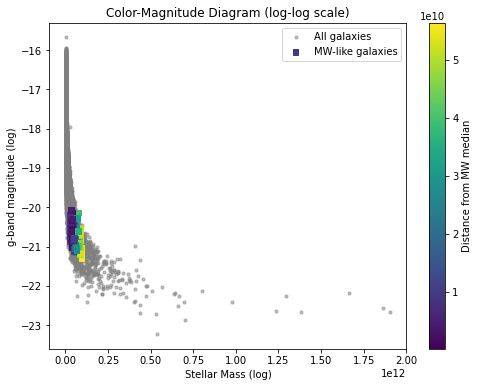

In [10]:
# Load the data from the file
data = np.loadtxt('query_data_part4.txt', delimiter=',')

# Filter galaxies at the latest snapshot because it was taking too long to run
latest_snapshot = data[:, 4].max()
data = data[data[:, 4] == latest_snapshot]

# Constants
mw_stellar_mass = 6.08e10
mw_stellar_mass_error = 1.14e10
mw_sfr = 1.65
mw_sfr_error = 0.19

# Filter Milky Way-like galaxies
stellar_mass = data[:, 0]  # Column index for 'stellar_mass'
SFR = data[:, 1]  # Column index for 'SFR'
filter = ((abs(stellar_mass - mw_stellar_mass) < 3 * mw_stellar_mass_error) & 
          (abs(SFR - mw_sfr) < 3 * mw_sfr_error))
mw_like_galaxies = data[filter]

# Calculate g-r color
g_band = data[:, 2]  # Column index for 'g_band'
r_band = data[:, 3]  # Column index for 'r_band'
color = g_band - r_band
mw_like_color = mw_like_galaxies[:, 2] - mw_like_galaxies[:, 3]

# Calculate 'distance' from the median MW value
mw_median = np.median(mw_like_galaxies[:, 0])
distance_from_median = abs(mw_like_galaxies[:, 0] - mw_median)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 2], c='gray', s=10, alpha=0.5, label='All galaxies')  # Column indices for 'stellar_mass' and 'g_band'
scatter = plt.scatter(mw_like_galaxies[:, 0], mw_like_galaxies[:, 2], c=distance_from_median, s=30, marker='s', cmap='viridis', label='MW-like galaxies')  # Column indices for 'stellar_mass' and 'g_band'
plt.xlabel("Stellar Mass (log)")
plt.ylabel("g-band magnitude (log)")
plt.title("Color-Magnitude Diagram (log-log scale)")
plt.legend()
plt.colorbar(scatter, label='Distance from MW median')
# plt.xscale('log')
# plt.yscale('log')
plt.show()


4.2 (TNG100-1) Isolating Milky Way-like galaxies in the galaxy color-magnitude diagram

In [4]:
import requests
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

baseUrl = 'http://www.tng-project.org/api/'
headers = {"api-key": "5616d71cc2f64b23e94946f406ece781"}  # Enter your own API key here

def get(path, params=None):
    r = requests.get(path, params=params, headers=headers)
    r.raise_for_status()
    if r.headers['content-type'] == 'application/json':
        return r.json()
    return r

z0url = 'http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos'

response = get(z0url)
n_gal = response['count']
print("Number of galaxies at z=0 in TNG100-1 simulation:", n_gal)

n_galaxies = 1000  # Number of galaxies to extract
subhalos = get(z0url, {'limit': n_galaxies})

fields = ['id', 'sfr', 'mass_stars', 'stellarphotometrics_g', 'stellarphotometrics_r']
r = {}
for field in fields:
    if field == 'id':
        r[field] = np.empty(n_galaxies, dtype=int)
    else:
        r[field] = np.empty(n_galaxies, dtype=float)

for i in tqdm(range(n_galaxies)):
    sub_i = get(subhalos['results'][i]['url'])
    for field in fields:
        r[field][i] = sub_i[field]

# Save the data to a file
np.savetxt('data_part42.txt', np.column_stack([r[field] for field in fields]), header='id sfr mass_stars stellarphotometrics_g stellarphotometrics_r')


Number of galaxies at z=0 in TNG100-1 simulation: 4371211


100%|███████████████████████████████████████| 1000/1000 [13:03<00:00,  1.28it/s]


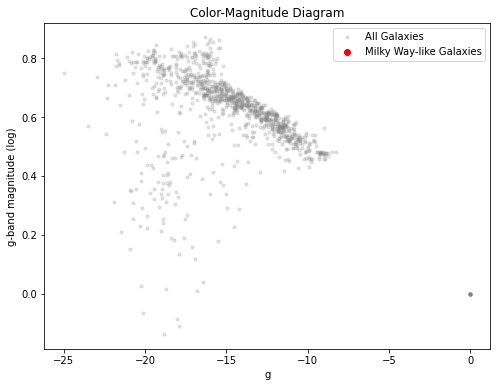

In [20]:
# Load the data from the file
galaxy_data = np.loadtxt('data_part42.txt', unpack=True, skiprows=1)

# Filter galaxies with stellar masses within three error-bars of the Milky Way's stellar mass
mw_stellar_mass = 6.08e10
mw_stellar_mass_error = 1.14e10
mass_min = mw_stellar_mass - 3 * mw_stellar_mass_error
mass_max = mw_stellar_mass + 3 * mw_stellar_mass_error
filtered_data = galaxy_data[:, np.logical_and(galaxy_data[2] >= mass_min, galaxy_data[2] <= mass_max)]

# Plotting color-magnitude diagram
g = galaxy_data[3]
g_r = galaxy_data[3] - galaxy_data[4]
mw_g = filtered_data[3]
mw_g_r = filtered_data[3] - filtered_data[4]

plt.figure(figsize=(8, 6))
plt.scatter(g, g_r, c='gray', s=10, alpha=0.2, label='All Galaxies')
plt.scatter(mw_g, mw_g_r, c='r', s=10, alpha=0.2, label='Milky Way-like Galaxies')
plt.xlabel('g')
plt.ylabel('g-band magnitude (log)')
plt.title('Color-Magnitude Diagram')
plt.legend()
plt.show()